# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name:

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [31]:
import requests
import pickle
import spacy  
import spacytextblob
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [32]:
URL = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
PICKLE_FILE = "article_html.pkl"

# Fetch the page
response = requests.get(URL)
response.raise_for_status()

# Parse with BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Extract the article HTML
article = soup.find("article")
article_html = str(article) if article else None

# Dump to pickle file
with open(PICKLE_FILE, "wb") as f:
    pickle.dump(article_html, f)

print(f"Article HTML extracted and saved to {PICKLE_FILE}")

Article HTML extracted and saved to article_html.pkl


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [33]:
PICKLE_FILE = "article_html.pkl"

# Load the article HTML from the pickle file
with open(PICKLE_FILE, "rb") as f:
    article_html = pickle.load(f)

# Parse the HTML and print its text
if article_html:
    soup = BeautifulSoup(article_html, "html.parser")
    print(soup.get_text())
else:
    print("No article HTML found in the pickle file.")



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [ ]:
PICKLE_FILE = "article_html.pkl"

# Load the article HTML from the pickle file
with open(PICKLE_FILE, "rb") as f:
    article_html = pickle.load(f)

# Parse the HTML and extract text
soup = BeautifulSoup(article_html, "html.parser")
text = soup.get_text()

# Load a trained spaCy pipeline
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

# Filter tokens: remove stopwords, punctuation, and whitespace
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count token frequencies
token_freq = Counter(tokens)
most_common = token_freq.most_common(5)

# Print results
print("Top 5 most frequent tokens:")
for token, freq in most_common:
    print(f"Token: '{token}' - Frequency: {freq}")

print("\nAll token frequencies:")
for token, freq in token_freq.items():
    print(f"Token: '{token}' - Frequency: {freq}")

Top 5 most frequent tokens:
Token: 'laser' - Frequency: 35
Token: 'headlights' - Frequency: 19
Token: 'headlight' - Frequency: 11
Token: 'technology' - Frequency: 10
Token: 'led' - Frequency: 10

All token frequencies:
Token: 'laser' - Frequency: 35
Token: 'headlights' - Frequency: 19
Token: 'work' - Frequency: 2
Token: '130' - Frequency: 1
Token: 'comments' - Frequency: 1
Token: 'lewin' - Frequency: 1
Token: 'day' - Frequency: 3
Token: 'march' - Frequency: 2
Token: '22' - Frequency: 1
Token: '2021' - Frequency: 1
Token: 'think' - Frequency: 1
Token: 'onward' - Frequency: 1
Token: 'automotive' - Frequency: 6
Token: 'technology' - Frequency: 10
Token: 'usually' - Frequency: 1
Token: 'thing' - Frequency: 2
Token: 'come' - Frequency: 5
Token: 'mind' - Frequency: 3
Token: 'engines' - Frequency: 1
Token: 'fuel' - Frequency: 1
Token: 'efficiency' - Frequency: 3
Token: 'switch' - Frequency: 2
Token: 'electric' - Frequency: 1
Token: 'power' - Frequency: 3
Token: 'mean' - Frequency: 1
Token: 't

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [ ]:
PICKLE_FILE = "article_html.pkl"

# Load the article HTML from the pickle file
with open(PICKLE_FILE, "rb") as f:
    article_html = pickle.load(f)

# Parse the HTML and extract text
soup = BeautifulSoup(article_html, "html.parser")
text = soup.get_text()

# Load a trained spaCy pipeline 
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

# Filter tokens: remove stopwords, punctuation, and whitespace, then get lemmas
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count lemma frequencies
lemma_freq = Counter(lemmas)
most_common = lemma_freq.most_common(5)

# Print results
print("Top 5 most frequent lemmas:")
for lemma, freq in most_common:
    print(f"Lemma: '{lemma}' - Frequency: {freq}")

print("\nAll lemma frequencies:")
for lemma, freq in lemma_freq.items():
    print(f"Lemma: '{lemma}' - Frequency: {freq}")

Top 5 most frequent lemmas:
Lemma: 'laser' - Frequency: 40
Lemma: 'headlight' - Frequency: 28
Lemma: 'beam' - Frequency: 12
Lemma: 'technology' - Frequency: 10
Lemma: 'led' - Frequency: 10

All lemma frequencies:
Lemma: 'laser' - Frequency: 40
Lemma: 'headlights' - Frequency: 2
Lemma: 'work' - Frequency: 3
Lemma: '130' - Frequency: 1
Lemma: 'comment' - Frequency: 1
Lemma: 'lewin' - Frequency: 1
Lemma: 'day' - Frequency: 4
Lemma: 'march' - Frequency: 2
Lemma: '22' - Frequency: 1
Lemma: '2021' - Frequency: 1
Lemma: 'think' - Frequency: 1
Lemma: 'onward' - Frequency: 1
Lemma: 'automotive' - Frequency: 6
Lemma: 'technology' - Frequency: 10
Lemma: 'headlight' - Frequency: 28
Lemma: 'usually' - Frequency: 1
Lemma: 'thing' - Frequency: 3
Lemma: 'come' - Frequency: 7
Lemma: 'mind' - Frequency: 3
Lemma: 'engine' - Frequency: 1
Lemma: 'fuel' - Frequency: 1
Lemma: 'efficiency' - Frequency: 3
Lemma: 'switch' - Frequency: 2
Lemma: 'electric' - Frequency: 1
Lemma: 'power' - Frequency: 3
Lemma: 'mean

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [42]:
PICKLE_FILE = "article_html.pkl"

def score_sentence_by_token(sentence, interesting_tokens):
    """
    Returns the number of times any interesting token appears in the sentence,
    divided by the number of words in the sentence.
    """
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)
    tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]
    if not tokens:
        return 0.0
    count = sum(1 for token in tokens if token in interesting_tokens)
    return count / len(tokens)

def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Returns the number of times any interesting lemma appears in the sentence,
    divided by the number of words in the sentence.
    """
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]
    if not lemmas:
        return 0.0
    count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return count / len(lemmas)

# --- Test the functions ---

# Load article HTML and extract text
with open(PICKLE_FILE, "rb") as f:
    article_html = pickle.load(f)
soup = BeautifulSoup(article_html, "html.parser")
text = soup.get_text()

# Load spaCy pipeline and process text
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

# Get sentences
sentences = list(doc.sents)
first_sentence = sentences[0].text if sentences else ""

# Get frequent tokens and lemmas from previous question
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]
token_freq = Counter(tokens)
most_common_tokens = [token for token, _ in token_freq.most_common(5)]

lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]
lemma_freq = Counter(lemmas)
most_common_lemmas = [lemma for lemma, _ in lemma_freq.most_common(5)]

# Score the first sentence
token_score = score_sentence_by_token(first_sentence, most_common_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, most_common_lemmas)

print(f"First sentence: {first_sentence}")
print(f"Score by frequent tokens: {token_score}")
print(f"Score by frequent lemmas: {lemma_score}")

First sentence: 

How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
Score by frequent tokens: 0.12121212121212122
Score by frequent lemmas: 0.09090909090909091


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

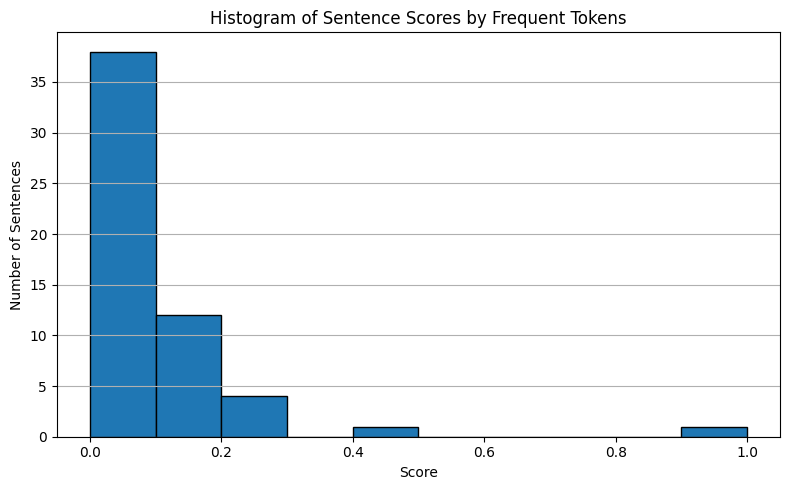

In [37]:
PICKLE_FILE = "article_html.pkl"

def score_sentence_by_token(sentence, interesting_tokens):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)
    tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]
    if not tokens:
        return 0.0
    count = sum(1 for token in tokens if token in interesting_tokens)
    return count / len(tokens)

# Load article HTML and extract text
with open(PICKLE_FILE, "rb") as f:
    article_html = pickle.load(f)
soup = BeautifulSoup(article_html, "html.parser")
text = soup.get_text()

# Load spaCy pipeline and process text
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

# Get frequent tokens
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]
token_freq = Counter(tokens)
most_common_tokens = [token for token, _ in token_freq.most_common(5)]

# Get sentences
sentences = list(doc.sents)

# Score each sentence
scores = [score_sentence_by_token(sent.text, most_common_tokens) for sent in sentences]

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(scores, bins=10, edgecolor='black')
plt.title("Histogram of Sentence Scores by Frequent Tokens")
plt.xlabel("Score")
plt.ylabel("Number of Sentences")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Most common range of scores appears to be 0.0–0.1 (most sentences

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

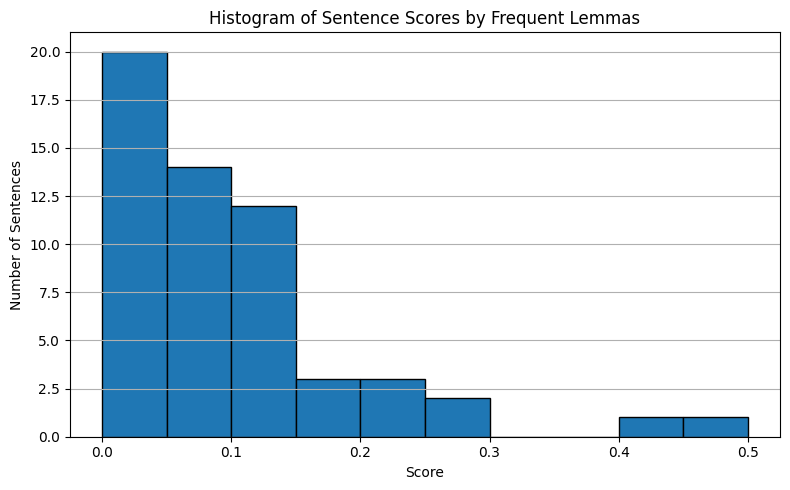

In [38]:
PICKLE_FILE = "article_html.pkl"

def score_sentence_by_lemma(sentence, interesting_lemmas):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]
    if not lemmas:
        return 0.0
    count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return count / len(lemmas)

# Load article HTML and extract text
with open(PICKLE_FILE, "rb") as f:
    article_html = pickle.load(f)
soup = BeautifulSoup(article_html, "html.parser")
text = soup.get_text()

# Load spaCy pipeline and process text
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

# Get frequent lemmas
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]
lemma_freq = Counter(lemmas)
most_common_lemmas = [lemma for lemma, _ in lemma_freq.most_common(5)]

# Get sentences
sentences = list(doc.sents)

# Score each sentence by lemma
scores = [score_sentence_by_lemma(sent.text, most_common_lemmas) for sent in sentences]

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(scores, bins=10, edgecolor='black')
plt.title("Histogram of Sentence Scores by Frequent Lemmas")
plt.xlabel("Score")
plt.ylabel("Number of Sentences")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Most common range of scores appears to be 0.0–0.1 (most sentences

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

In [39]:
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space and token.pos_ == "NOUN"
]
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space and token.pos_ == "NOUN"
]